In [29]:
import os
import pandas as pd
import json
from sklearn.preprocessing import StandardScaler
import sentence_transformers
from numpy.linalg import norm
import numpy as np
import umap
import pickle
import matplotlib.pyplot as plt


In [2]:
delfi_to_ee = pickle.load(open("../estonian_to_latvian_sbert_rankings.pkl","rb"))

In [3]:
unique_ids = set([x for c in delfi_to_ee for x in delfi_to_ee[c]])

In [4]:
def embedd_texts(text):
    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('xlm-r-distilroberta-base-paraphrase-v1')
    embedded = model.encode(text)
    return embedded    

In [5]:
reducer = umap.UMAP()

In [6]:
def project_data(data):
    scaled_data = StandardScaler().fit_transform(data)
    l1_norm = np.abs(scaled_data).sum(axis=1)
    scaled_data = scaled_data / l1_norm[:, np.newaxis]
    embedding = reducer.fit_transform(scaled_data)
    return embedding

In [8]:
filepaths = {'estonian': '../articles/',
             'latvian': '../DELFI_subcorpus/subcorpus.json'}


In [9]:
#Read original 100 articles
original_delfi_data = json.load(open(filepaths['latvian'], 'r'))['list']
delfi_embed = embedd_texts(original_delfi_data)

In [12]:
ids2texts = pickle.load(open("../pickles/latvian_embeddings.pkl","rb"))

In [16]:
embedd_docs = pickle.load(open("../pickles/_sbert_embedded.pkl","rb"))

In [17]:
#embedd_docs = embedd_texts(list(ids2texts.values()))
ids2embs = dict(zip(ids2texts.keys(), embedd_docs))
#

In [18]:
def project(delfi_embed, ids2embs, parameter = 10):
    project_ids = set([x for delf in delfi_to_ee for x in delfi_to_ee[delf][:parameter]])
    ee_outs = [ids2embs[key] for key in project_ids]
    merge_embs = np.vstack((ee_outs, delfi_embed))
    merge_proj = project_data(merge_embs)
    delf_len = len(delfi_embed) #.shape[0]
    main_len = len(ee_outs)#.shape[0]
    colors = ["blue"] * main_len + ['red'] * delf_len
    plt.xlabel('UMAP-1D')  
    plt.ylabel('UMAP-2D')  
    plt.title("Delfi to estonian @ " + str(parameter)) 
    plt.scatter(merge_proj[:, 0], merge_proj[:, 1], s = 10, color = colors)
    

In [20]:
import os
os.listdir("../../")

tarmos_list_f = open("../pairs_latvian_part.c","r", encoding='utf-8')
tarmos_files = [ line.strip() for line in tarmos_list_f.readlines() ]


In [21]:
embedd_tarmos = embedd_texts(tarmos_files)


In [23]:
with open('../pickles/latvian_embeddings.pkl', "rb") as f:
    ids2texts_lv = pickle.load(f)

In [26]:
embedd_lv = pickle.load(open("../pickles/latvian_pickle.pkl","rb"))

In [30]:
def project2(embedd_tarmos, delfi_embed, ids2embs, parameter = 10):
    project_ids = set([x for delf in delfi_to_ee for x in delfi_to_ee[delf][:parameter]])
    ee_outs = [ids2embs[key] for key in project_ids]
    merge_embs = np.vstack((embedd_tarmos, np.vstack((ee_outs, embedd_lv))))
    merge_proj = project_data(merge_embs)
    delf_len = len(embedd_lv) #.shape[0]
    main_len = len(ee_outs)#.shape[0]
    tarmo_len = embedd_tarmos.shape[0]
    tarmo_list = project_data(embedd_tarmos)
    #colors = ["orange"] * tarmo_list.shape[0] + ["red"] * main_len + ['blue'] * delf_len
    plt.xlabel('dimension 1')  
    plt.ylabel('dimension 2')  
    plt.title("Delfi to estonian to Latvian @ " + str(parameter)) 
    #sizes = [150] * (main_len + tarmo_list.shape[0]) + [5] * delf_len
    #plt.legend(loc=0, prop={'tarmo' : 'orange', 'elaine' : 'orange', 'lv_articles' : 'blue'})
    plt.scatter(merge_proj[:tarmo_len, 0], merge_proj[:tarmo_len, 1], s = 6, color = "orange", zorder=3, label = "query docs")#colors)
    plt.scatter(merge_proj[tarmo_len:(main_len + tarmo_len) , 0], merge_proj[tarmo_len:(main_len + tarmo_len), 1], s = 3, color = "red", zorder=2, label = "retrieved docs")
    plt.scatter(merge_proj[(main_len + tarmo_len):, 0], merge_proj[(main_len + tarmo_len):, 1], s = 1, color = "blue", zorder=1, label = "latvian docs")
    plt.legend(loc='best')
    plt.savefig("outs_"+str(parameter)+".pdf")

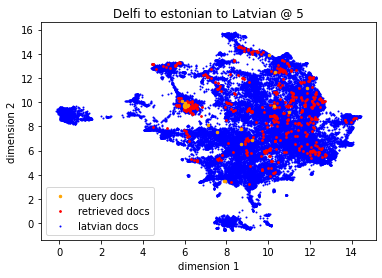

In [31]:
project2(embedd_tarmos, delfi_embed, ids2embs, parameter = 5)

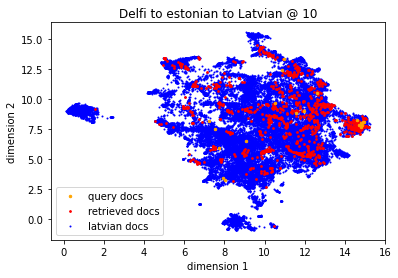

In [32]:
project2(embedd_tarmos, delfi_embed, ids2embs, parameter = 10)

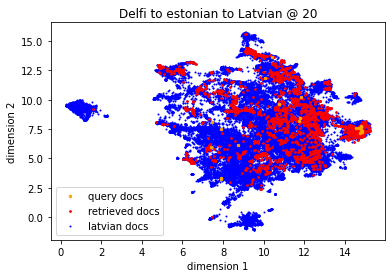

In [33]:
project2(embedd_tarmos, delfi_embed, ids2embs, parameter = 20)

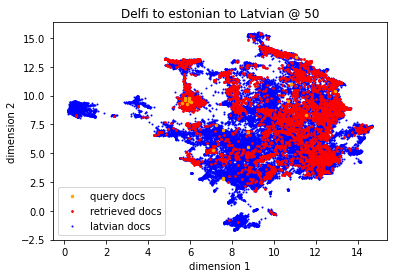

In [34]:
project2(embedd_tarmos, delfi_embed, ids2embs, parameter = 50)

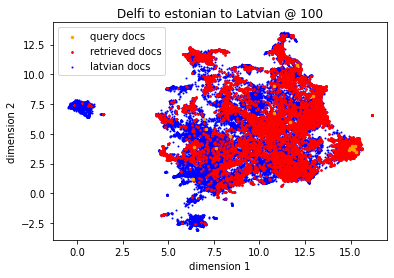

In [35]:
project2(embedd_tarmos, delfi_embed, ids2embs, parameter = 100)

In [37]:
estonian2latvian = pickle.load(open("../pickles/estonian_to_latvian_sbert_rankings.pkl","rb"))

In [38]:
from scipy import spatial
def find_closest_k(tarmos,  delfi_embed, ids2embs, parameter = 5):
    project_ids = set([x for delf in delfi_to_ee for x in delfi_to_ee[delf][:parameter]])
    ee_outs = [ids2embs[key] for key in project_ids]
    tree = spatial.KDTree(ee_outs)
    for tarmo in tarmos:
        #for elaine in ee_outs:
        print(tree.query(tarmo))          

find_closest_k(embedd_tarmos, delfi_embed, ids2embs, parameter = 5)

In [39]:
find_closest_k(embedd_tarmos, delfi_embed, ids2embs, parameter = 10)

(3.8651472087930503, 659)
(4.239860958484044, 201)
(3.284523498903345, 527)
(3.9252681821130553, 475)
(3.691722560028453, 205)
(3.299716919841397, 564)
(4.805957770048839, 74)
(5.513693951028818, 450)
(3.30048379873176, 201)
(3.454213335036245, 122)
(4.932761907790056, 878)
(4.025599599736426, 729)
(2.65088457812153, 895)
(3.402824171256699, 349)
(3.9203046511543054, 729)
(4.814936381511687, 353)
(4.047359338818584, 62)
(5.28429309240896, 293)
(4.243153773397396, 74)
(3.2722686501622578, 59)


In [40]:
find_closest_k(embedd_tarmos, delfi_embed, ids2embs, parameter = 50)

(3.4868823866472276, 2195)
(3.9839852427059546, 2901)
(3.284523498903345, 2619)
(3.9252681821130553, 1497)
(3.691722560028453, 3297)
(3.299716919841397, 3669)
(4.805957770048839, 3141)
(5.513693951028818, 1479)
(3.1826690841491603, 1929)
(3.454213335036245, 3190)
(4.7403370416066455, 2666)
(3.89839093189595, 2976)
(2.65088457812153, 1985)
(3.1226698409636784, 2494)
(3.9203046511543054, 1789)
(4.796965088692935, 794)
(2.2394272473867463, 237)
(4.332081848009905, 267)
(4.243153773397396, 3141)
(3.15838173591567, 1977)


In [41]:
find_closest_k(embedd_tarmos, delfi_embed, ids2embs, parameter = 100)

(3.4230736927837406, 7240)
(3.950271094239577, 4354)
(3.284523498903345, 3013)
(3.9252681821130553, 2533)
(3.691722560028453, 5162)
(3.299716919841397, 1654)
(4.805957770048839, 3253)
(5.513693951028818, 6176)
(3.1826690841491603, 2704)
(3.454213335036245, 6948)
(4.7403370416066455, 6695)
(3.871033222781402, 902)
(2.65088457812153, 897)
(3.1226698409636784, 1140)
(3.9203046511543054, 2645)
(4.272957415262675, 5303)
(2.2394272473867463, 84)
(4.332081848009905, 5654)
(4.224031094211337, 1694)
(3.15838173591567, 2724)


In [42]:
from scipy import spatial
def find_closest_k_blue(tarmos, parameter = 5):
    tree = spatial.KDTree(embedd_lv)
    for tarmo in tarmos:
        print(tree.query(tarmo))   
        
        

In [43]:
find_closest_k_blue(embedd_tarmos, 5)

(3.740257226981947, 24349)
(3.628281250202981, 21401)
(3.284523498903345, 22339)
(3.9252681821130553, 8950)
(3.691722560028453, 22884)
(3.299716919841397, 19806)
(4.709541885392857, 22510)
(5.009316325999933, 23874)
(3.1826690841491603, 10371)
(3.454213335036245, 11589)
(4.425324697172312, 1114)
(2.110412117091298, 16938)
(2.65088457812153, 14074)
(3.1226698409636784, 3523)
(3.9203046511543054, 12680)
(3.7083590693979884, 12236)
(2.2394272473867463, 1638)
(3.9326303794491504, 2387)
(3.7298626741020957, 404)
(3.15838173591567, 4633)


In [44]:
find_closest_k(embedd_tarmos, delfi_embed, ids2embs, parameter = 5)

(3.8651472087930503, 348)
(4.308187226372909, 411)
(3.4021422182494967, 28)
(3.9252681821130553, 254)
(3.692770461239902, 317)
(3.9995010618582247, 41)
(4.805957770048839, 41)
(5.54017092197066, 41)
(3.3633637378686543, 44)
(3.454213335036245, 62)
(4.932761907790056, 451)
(4.106041940128476, 359)
(2.8026636845755597, 363)
(3.476479847083011, 258)
(3.9794973474785458, 451)
(4.814936381511687, 189)
(4.27142068477272, 293)
(5.668068001540558, 41)
(4.243153773397396, 41)
(3.2722686501622578, 33)


In [45]:
from scipy import spatial
def find_closest_k_blue(tarmos, parameter = 5):
    tree = spatial.KDTree(embedd_lv)
    for tarmo in tarmos:
        #for elaine in ee_outs:
        print(tree.query(tarmo))           

In [46]:
from scipy import spatial
def find_closest_k_n(tarmos,  delfi_embed, ids2embs, parameter = 5):
    project_ids = set([x for delf in delfi_to_ee for x in delfi_to_ee[delf][:parameter]])
    ee_outs = [ids2embs[key] for key in project_ids]
    len_red_space = len(ee_outs)
    len_blue_space = len(embedd_lv)
    merged = np.vstack((ee_outs, embedd_lv))
    tree = spatial.KDTree(merged)
    k_list = []
    for k in range(3,100):
        ratios = []
        red_hits = 0
        blue_hits = 0
        for tarmo in tarmos:
            #for elaine in ee_outs:
            dist, ind = tree.query(tarmo,k)
            for i in ind:
                if i <= len_red_space:
                    red_hits = red_hits + 1
                else:
                    blue_hits = blue_hits + 1
            blaz_ratio = red_hits / (red_hits+blue_hits)
            ratios.append(blaz_ratio)
        avg_ratio_at_k = sum(ratios)/len(ratios)
        k_list.append(avg_ratio_at_k)
    plt.title('Retrieved documents ratio @ '+str(parameter))
    plt.xlabel('K-retrieved neighbours')  
    plt.ylabel('SNIR') 
    plt.plot(list(range(3,100)), k_list)
        

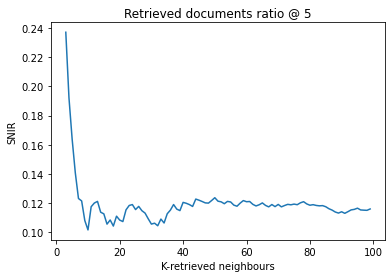

In [47]:
find_closest_k_n(embedd_tarmos, delfi_embed, ids2embs, parameter = 5)

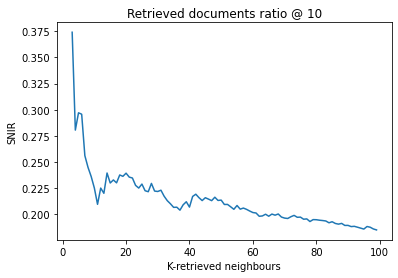

In [48]:
find_closest_k_n(embedd_tarmos, delfi_embed, ids2embs, parameter = 10)

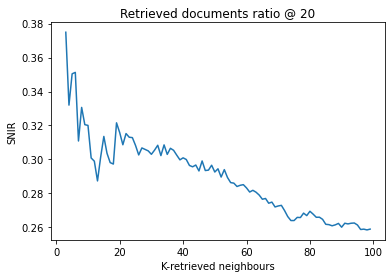

In [49]:
find_closest_k_n(embedd_tarmos, delfi_embed, ids2embs, parameter = 20)

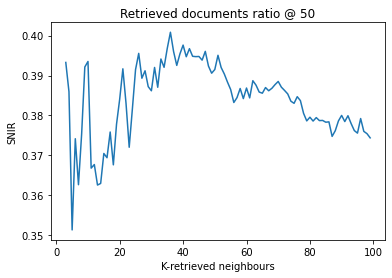

In [50]:
find_closest_k_n(embedd_tarmos, delfi_embed, ids2embs, parameter = 50)

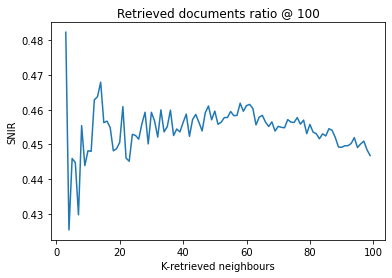

In [51]:
find_closest_k_n(embedd_tarmos, delfi_embed, ids2embs, parameter = 100)

In [52]:
import datetime
date_last_7_f = '2019-11-30T07:00:00.000Z'
date_last_7 = datetime.datetime.strptime(date_last_7_f, '%Y-%m-%dT%H:%M:%S.%fZ')

In [54]:
json_files = ["../articles/lv_2019.json"]
parse_lasts = []
titles_lasts = []
ids_lasts = []
for jf in json_files:
    print("JSON file:", jf)
    articles = json.load(open(jf, 'r', encoding='utf-8'))
    print("Articles:", len(articles))
    for art in articles:
        timez = datetime.datetime.strptime(art["publishDate"], '%Y-%m-%dT%H:%M:%S.%fZ')
        if timez >= date_last_7 and art["channelLanguage"] == 'nat':   
            texts = art['title'].lower() + ' ' + art['bodyText'].lower()
            parse_lasts.append(texts)
            titles_lasts.append(art['title'].lower())
            ids_lasts.append(art['id'])

JSON file: ../articles/lv_2019.json
Articles: 29070


In [55]:
embedd_last_7 = embedd_texts(parse_lasts)

In [56]:
from scipy import spatial
import random
def find_closest_k_n_2_cols(tarmos,  delfi_embed, ids2embs, parameter = 5):
    project_ids = set([x for delf in delfi_to_ee for x in delfi_to_ee[delf][:parameter]])
    ee_outs = [ids2embs[key] for key in project_ids]
    len_red_space = len(ee_outs)
    len_blue_space = len(embedd_lv)
    merged = np.vstack((ee_outs, embedd_lv))
    tree = spatial.KDTree(merged)
    random_pivots = random.choices(embedd_lv, k = 20)
    plt.title('Retrieved documents ratio @ '+str(parameter))
    plt.xlabel('K-retrieved neighbours')  
    plt.ylabel('SNIR') 

    for name, pivot in [("query documents",tarmos), ("random documents", random_pivots)]:
        k_list = []
        for k in range(3,100):
            ratios = []
            red_hits = 0
            blue_hits = 0
            for tarmo in pivot:
                #for elaine in ee_outs:
                dist, ind = tree.query(tarmo,k)
                for i in ind:
                    if i <= len_red_space:
                        red_hits = red_hits + 1
                    else:
                        blue_hits = blue_hits + 1
                blaz_ratio = red_hits / (red_hits+blue_hits)
                ratios.append(blaz_ratio)
            avg_ratio_at_k = sum(ratios)/len(ratios)
            k_list.append(avg_ratio_at_k)
        plt.plot(list(range(3,100)), k_list, label = name)
    plt.legend(loc='best')
    plt.savefig('qr_eval.pdf')

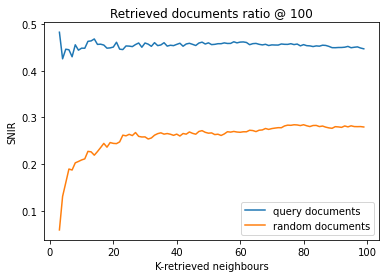

In [57]:
find_closest_k_n_2_cols(embedd_tarmos, delfi_embed, ids2embs, parameter = 100)

In [58]:
from scipy import spatial
def find_closest_fixed(tarmos,  delfi_embed, ids2embs, titles, parameter = 5, k = 20):
    project_ids = set([x for delf in delfi_to_ee for x in delfi_to_ee[delf][:parameter]])
    ee_outs = [ids2embs[key] for key in project_ids]
    len_red_space = len(ee_outs)
    len_blue_space = len(embedd_lv) 
    merged = np.vstack((ee_outs, embedd_lv))
    tree = spatial.KDTree(merged)
    k_list = []
    ratios = []
    red_hits = 0
    blue_hits = 0
    for title, text, ids, tarmo in zip(titles,parse_lasts,ids_lasts, tarmos):
        #for elaine in ee_outs:
        dist, ind = tree.query(tarmo,k)
        for i in ind:
            if i <= len_red_space:
                red_hits = red_hits + 1
            else:
                blue_hits = blue_hits + 1
        blaz_ratio = red_hits / (red_hits+blue_hits)
        
        ratios.append((title, text, ids, blaz_ratio))
    return ratios

In [59]:
out_df = find_closest_fixed(embedd_last_7, delfi_embed, ids2embs, titles_lasts, parameter = 20, k = 100)

In [60]:
import pandas as pd
x = pd.DataFrame(out_df)
x["id"] = x[2]
x["text"] = x[1]
x["score"] = x[3]
del x[0]
del x[1]
del x[2]
del x[3]
x = x.sort_values(by=['score'], ascending=False)
x["score"].describe()
x


,id,text,score
1,51671721,elektrisko skrejriteņu bums: izbeidz latvijā p...,0.150000
7,51679271,asv nelegālos imigrantus ķer viltus universitā...,0.108750
25,51682113,sveču gaismā pie brīvības pieminekļa piemin ru...,0.108077
14,51681473,"gripas intensitāte zema, bet saslimušo skaits ...",0.106000
13,51681411,levita solidaritātes sarunās rosina izskaust t...,0.105714
...,...,...,...
66,51678833,"vilnis vējš, 'rīgas laiks': vieni vienīgi atkr...",0.076866
65,51678825,līdz ar pirmo adventi sākas ziemassvētku gaidī...,0.076818
63,51678107,piedalies konkursā 'mans skaistais adventes va...,0.076406
4,51676189,"vecākiem, kuru bērns saindējās ar metadonu, bū...",0.066000
